In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick 
%matplotlib inline

In [2]:
DVS=pd.read_excel("CHURNDATA (1).xlsx",engine='openpyxl')

In [3]:
DVS.head()

,CIF,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,XXXXXX,Feb 13 1970 12:00AM,49,7116.64,MALE,MARRIED,1994-06-30,25,277,265,...,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE,ACTIVE
1,XXXXXX,Sep 20 1973 12:00AM,46,1500000.00,FEMALE,SINGLE,2005-05-19,14,37,15,...,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,LOW,ACTIVE
2,XXXXXX,Jul 18 1966 12:00AM,53,5000000.00,FEMALE,SINGLE,2005-05-20,14,31,14,...,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,MIDLE,ACTIVE
3,XXXXXX,Jan 9 2004 12:00AM,15,500.00,FEMALE,SINGLE,2005-05-20,14,0,1,...,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,LOW,ACTIVE
4,XXXXXX,Mar 7 1971 12:00AM,48,9000000.00,FEMALE,SINGLE,2014-06-30,5,15,33,...,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,LOW,ACTIVE


In [4]:
DVS.shape

(1249, 28)

In [5]:
DVS.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   CIF                                 1249 non-null   object        
 1   CUS_DOB                             1249 non-null   object        
 2   AGE                                 1249 non-null   int64         
 3   CUS_Month_Income                    1238 non-null   float64       
 4   CUS_Gender                          1247 non-null   object        
 5   CUS_Marital_Status                  1249 non-null   object        
 6   CUS_Customer_Since                  1249 non-null   datetime64[ns]
 7   YEARS_WITH_US                       1249 non-null   int64         
 8   # total debit transactions for S1   1249 non-null   int64         
 9   # total debit transactions for S2   1249 non-null   int64         
 10  # total debit transactio

Text(0.5, 1.02, 'Count of TARGET Variable per category')

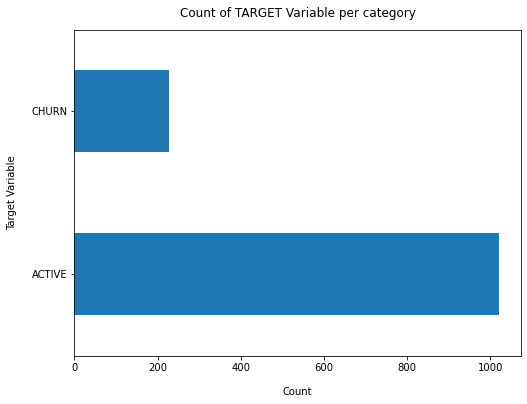

In [6]:
DVS['Status'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02)

In [7]:
100*DVS['Status'].value_counts()/len(DVS['Status'])

ACTIVE    81.82546
CHURN     18.17454
Name: Status, dtype: float64

In [8]:
DVS['Status'].value_counts()

ACTIVE    1022
CHURN      227
Name: Status, dtype: int64

* Data is highly imbalanced, ratio = 73:27
* So we analyse the data with other features while taking the target values separately to get some insights.

C:\Users\bujjibabu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


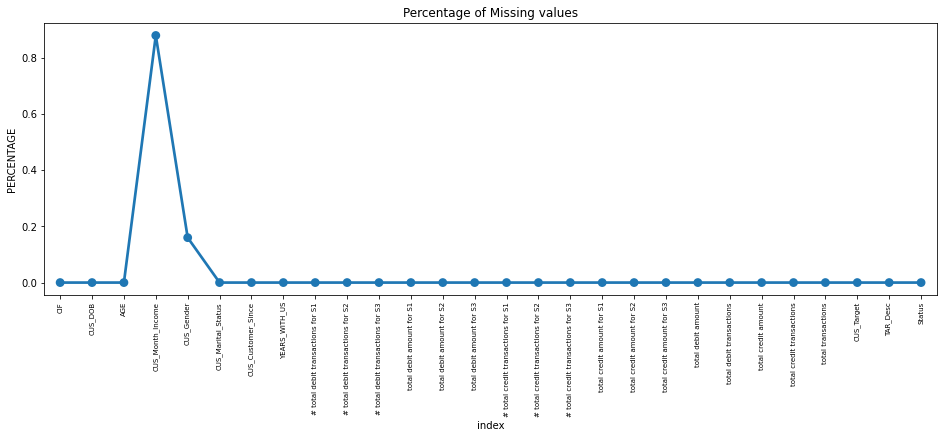

In [9]:
missing = pd.DataFrame((DVS.isnull().sum())*100/DVS.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

### Missing Data - Initial Intuition

* Here, we have high missing data in [CUS_Month_Income] followed by [CUS_Gender] columns

## Data Cleaning
**1.** Create a copy of base data for manupulation & processing

In [10]:
a=DVS.copy()

In [11]:
a=DVS.drop(['CIF','CUS_DOB','CUS_Customer_Since','TAR_Desc'],axis=1)

In [12]:
a

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,...,total credit amount for S1,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,Status
0,49,7116.64,MALE,MARRIED,25,277,265,345,1459126.64,1230543.08,...,1516981.10,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,ACTIVE
1,46,1500000.00,FEMALE,SINGLE,14,37,15,45,35372.55,20134.00,...,10000.00,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,ACTIVE
2,53,5000000.00,FEMALE,SINGLE,14,31,14,8,28248.85,4777.66,...,709625.00,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,ACTIVE
3,15,500.00,FEMALE,SINGLE,14,0,1,0,0.00,4000.00,...,30103.05,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,ACTIVE
4,48,9000000.00,FEMALE,SINGLE,5,15,33,12,69083.38,223007.51,...,195600.00,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,ACTIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,68,4500.00,MALE,SINGLE,14,13,12,1,3069.60,2376.00,...,0.00,0.00,0.00,5645.60,26,0.00,0,26,2223,CHURN
1245,35,3500000.00,MALE,SINGLE,14,55,35,37,119297.02,118884.00,...,114601.14,119137.62,440891.65,385735.90,127,674630.41,22,149,2222,ACTIVE
1246,34,1000.00,MALE,SINGLE,14,415,368,424,1068684.72,571814.89,...,936134.09,733658.65,971555.27,2473621.68,1207,2641348.01,217,1424,2232,ACTIVE
1247,69,2000000.00,MALE,SINGLE,14,147,202,234,397602.73,514584.25,...,377245.00,532708.75,400814.60,1371852.22,583,1310768.35,48,631,2222,ACTIVE


In [13]:
a.describe()

,AGE,CUS_Month_Income,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,total debit amount for S3,# total credit transactions for S1,...,# total credit transactions for S3,total credit amount for S1,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target
count,1249.000000,1.238000e+03,1249.000000,1249.000000,1249.000000,1249.000000,1.249000e+03,1.249000e+03,1.249000e+03,1249.000000,...,1249.000000,1.249000e+03,1.249000e+03,1.249000e+03,1.249000e+03,1249.000000,1.249000e+03,1249.000000,1249.000000,1249.000000
mean,46.746998,2.764869e+06,14.116894,54.262610,55.680544,56.966373,3.147439e+05,3.090418e+05,3.061457e+05,7.613291,...,8.675741,3.089540e+05,3.173819e+05,3.020052e+05,9.299314e+05,166.909528,9.283411e+05,24.559648,191.469175,2222.296237
std,12.315109,5.406761e+06,2.279882,80.732325,81.020146,84.649516,1.513433e+06,1.293928e+06,9.385775e+05,13.543207,...,14.087572,1.631418e+06,1.048443e+06,1.273680e+06,3.142967e+06,235.386076,3.685585e+06,38.467079,263.353988,3.314255
min,14.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,2211.000000
25%,39.000000,7.568750e+03,14.000000,7.000000,6.000000,6.000000,1.155000e+04,1.122578e+04,7.085000e+03,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,5.642350e+04,26.000000,1.511744e+04,2.000000,33.000000,2222.000000
50%,46.000000,1.500000e+06,14.000000,22.000000,24.000000,24.000000,5.395632e+04,6.158130e+04,5.907391e+04,6.000000,...,6.000000,4.522084e+04,4.679082e+04,4.952000e+04,2.031400e+05,74.000000,1.525319e+05,18.000000,90.000000,2223.000000
75%,55.000000,3.000000e+06,14.000000,65.000000,65.000000,68.000000,1.892775e+05,2.096500e+05,2.250619e+05,8.000000,...,10.000000,1.720000e+05,1.872971e+05,1.950319e+05,6.613808e+05,196.000000,5.853255e+05,28.000000,227.000000,2223.000000
max,119.000000,8.000000e+07,28.000000,715.000000,547.000000,757.000000,3.573349e+07,3.723382e+07,1.866511e+07,189.000000,...,169.000000,4.920688e+07,1.753799e+07,3.764708e+07,6.997262e+07,1859.000000,1.043919e+08,429.000000,2174.000000,2236.000000


In [14]:
a.isnull().sum()

AGE                                    0
CUS_Month_Income                      11
CUS_Gender                             2
CUS_Marital_Status                     0
YEARS_WITH_US                          0
# total debit transactions for S1      0
# total debit transactions for S2      0
# total debit transactions for S3      0
total debit amount for S1              0
total debit amount for S2              0
total debit amount for S3              0
# total credit transactions for S1     0
# total credit transactions for S2     0
# total credit transactions for S3     0
total credit amount for S1             0
total credit amount for S2             0
total credit amount for S3             0
total debit amount                     0
total debit transactions               0
total credit amount                    0
total credit transactions              0
total transactions                     0
CUS_Target                             0
Status                                 0
dtype: int64

**** As we can see there are 11 missing values in "CUS_Month_Income" column. Let's replace it my mean value of the column ****

In [15]:
a['CUS_Month_Income']=a['CUS_Month_Income'].fillna(a['CUS_Month_Income'].mean())

In [16]:
a.isnull().sum()

AGE                                   0
CUS_Month_Income                      0
CUS_Gender                            2
CUS_Marital_Status                    0
YEARS_WITH_US                         0
# total debit transactions for S1     0
# total debit transactions for S2     0
# total debit transactions for S3     0
total debit amount for S1             0
total debit amount for S2             0
total debit amount for S3             0
# total credit transactions for S1    0
# total credit transactions for S2    0
# total credit transactions for S3    0
total credit amount for S1            0
total credit amount for S2            0
total credit amount for S3            0
total debit amount                    0
total debit transactions              0
total credit amount                   0
total credit transactions             0
total transactions                    0
CUS_Target                            0
Status                                0
dtype: int64

In [17]:
a['CUS_Gender'].unique()

array(['MALE', 'FEMALE', nan], dtype=object)

In [18]:
a['CUS_Gender'].value_counts()

MALE      741
FEMALE    506
Name: CUS_Gender, dtype: int64

**** As we can see there are nan values in "CUS_Gender" column. Let's drop thoes two rows ****

In [19]:
dvs=a.dropna()

In [20]:
dvs.head()

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,...,total credit amount for S1,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,Status
0,49,7116.64,MALE,MARRIED,25,277,265,345,1459126.64,1230543.08,...,1516981.10,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,ACTIVE
1,46,1500000.00,FEMALE,SINGLE,14,37,15,45,35372.55,20134.00,...,10000.00,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,ACTIVE
2,53,5000000.00,FEMALE,SINGLE,14,31,14,8,28248.85,4777.66,...,709625.00,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,ACTIVE
3,15,500.00,FEMALE,SINGLE,14,0,1,0,0.00,4000.00,...,30103.05,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,ACTIVE
4,48,9000000.00,FEMALE,SINGLE,5,15,33,12,69083.38,223007.51,...,195600.00,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,ACTIVE


In [22]:
dvs.isnull().sum()

AGE                                   0
CUS_Month_Income                      0
CUS_Gender                            0
CUS_Marital_Status                    0
YEARS_WITH_US                         0
# total debit transactions for S1     0
# total debit transactions for S2     0
# total debit transactions for S3     0
total debit amount for S1             0
total debit amount for S2             0
total debit amount for S3             0
# total credit transactions for S1    0
# total credit transactions for S2    0
# total credit transactions for S3    0
total credit amount for S1            0
total credit amount for S2            0
total credit amount for S3            0
total debit amount                    0
total debit transactions              0
total credit amount                   0
total credit transactions             0
total transactions                    0
CUS_Target                            0
Status                                0
dtype: int64

In [23]:
 b= dvs.copy()

In [24]:
 dvs_new=dvs.rename(columns = {"total transactions": "Totaltransactions", 'total credit transactions': 'Totalcredittransactions',
                                 'total credit amount': 'Totalcreditamount', 'total debit transactions': 'Totaldebittransactions',
                                 'total debit amount': 'Totaldebitamount','total credit amount for S3':'TotalcreditamountforS3',
                                 'total credit amount for S2':'TotalcreditamountforS2',"total credit amount for S1":'TotalcreditamountforS1',
                                 '# total credit transactions for S3':'TotalcredittransactionsforS3','# total credit transactions for S2':"TotalcredittransactionsforS2",
                                  "# total credit transactions for S1":'TotalcredittransactionsforS1',"total debit amount for S3":'TotaldebitamountforS3',
                                  'total debit amount for S2':'TotaldebitamountforS2','total debit amount for S1':'TotaldebitamountforS1','# total debit transactions for S3':'TotaldebittransactionsforS3',
                                   "# total debit transactions for S2":'TotaldebittransactionsforS2','# total debit transactions for S1':'TotaldebittransactionsforS1'})


C:\Users\bujjibabu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


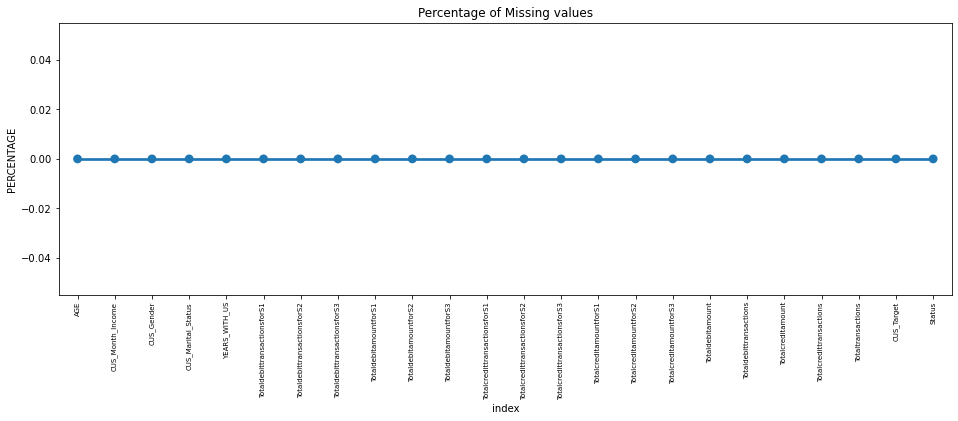

In [25]:
missing = pd.DataFrame((dvs_new.isnull().sum())*100/dvs.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

## Data Exploration
**1. ** Plot distibution of individual predictors by Status

### Univariate Analysis

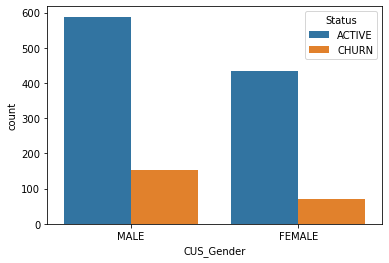

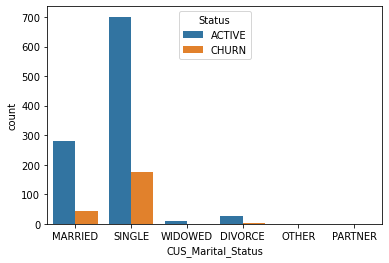

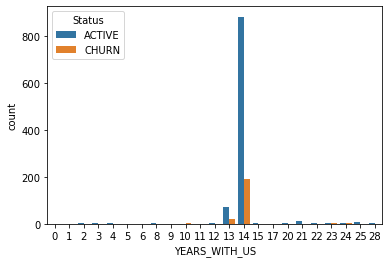

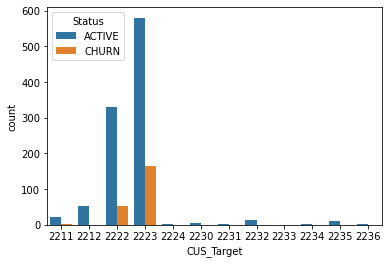

In [26]:
for i, predictor in enumerate(dvs_new.drop(columns=['Status','AGE','CUS_Month_Income','TotaldebittransactionsforS1','TotaldebittransactionsforS2','TotaldebittransactionsforS3','TotalcredittransactionsforS1','TotalcredittransactionsforS2',
                                                    'TotalcredittransactionsforS3','TotalcreditamountforS1','TotalcreditamountforS2','TotalcreditamountforS3','Totaldebittransactions','Totaldebitamount','Totalcreditamount',
                                                      'TotaldebitamountforS1','TotaldebitamountforS2','TotaldebitamountforS3','Totaltransactions','Totalcredittransactions'])):
                                             
    plt.figure(i)
    sns.countplot(data=dvs_new, x=predictor, hue='Status')

In [27]:
dvs_new

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,TotaldebittransactionsforS1,TotaldebittransactionsforS2,TotaldebittransactionsforS3,TotaldebitamountforS1,TotaldebitamountforS2,...,TotalcreditamountforS1,TotalcreditamountforS2,TotalcreditamountforS3,Totaldebitamount,Totaldebittransactions,Totalcreditamount,Totalcredittransactions,Totaltransactions,CUS_Target,Status
0,49,7116.64,MALE,MARRIED,25,277,265,345,1459126.64,1230543.08,...,1516981.10,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,ACTIVE
1,46,1500000.00,FEMALE,SINGLE,14,37,15,45,35372.55,20134.00,...,10000.00,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,ACTIVE
2,53,5000000.00,FEMALE,SINGLE,14,31,14,8,28248.85,4777.66,...,709625.00,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,ACTIVE
3,15,500.00,FEMALE,SINGLE,14,0,1,0,0.00,4000.00,...,30103.05,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,ACTIVE
4,48,9000000.00,FEMALE,SINGLE,5,15,33,12,69083.38,223007.51,...,195600.00,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,ACTIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,68,4500.00,MALE,SINGLE,14,13,12,1,3069.60,2376.00,...,0.00,0.00,0.00,5645.60,26,0.00,0,26,2223,CHURN
1245,35,3500000.00,MALE,SINGLE,14,55,35,37,119297.02,118884.00,...,114601.14,119137.62,440891.65,385735.90,127,674630.41,22,149,2222,ACTIVE
1246,34,1000.00,MALE,SINGLE,14,415,368,424,1068684.72,571814.89,...,936134.09,733658.65,971555.27,2473621.68,1207,2641348.01,217,1424,2232,ACTIVE
1247,69,2000000.00,MALE,SINGLE,14,147,202,234,397602.73,514584.25,...,377245.00,532708.75,400814.60,1371852.22,583,1310768.35,48,631,2222,ACTIVE


**** Convert the target variable 'Status'  in a binary numeric variable i.e. ACTIVE=0 ;CHURN = 1 ****

In [28]:
dvs_new['Status'] = np.where(dvs_new.Status == 'ACTIVE',0,1)

In [29]:
dvs_new.head()

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,TotaldebittransactionsforS1,TotaldebittransactionsforS2,TotaldebittransactionsforS3,TotaldebitamountforS1,TotaldebitamountforS2,...,TotalcreditamountforS1,TotalcreditamountforS2,TotalcreditamountforS3,Totaldebitamount,Totaldebittransactions,Totalcreditamount,Totalcredittransactions,Totaltransactions,CUS_Target,Status
0,49,7116.64,MALE,MARRIED,25,277,265,345,1459126.64,1230543.08,...,1516981.10,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,0
1,46,1500000.00,FEMALE,SINGLE,14,37,15,45,35372.55,20134.00,...,10000.00,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,0
2,53,5000000.00,FEMALE,SINGLE,14,31,14,8,28248.85,4777.66,...,709625.00,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,0
3,15,500.00,FEMALE,SINGLE,14,0,1,0,0.00,4000.00,...,30103.05,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,0
4,48,9000000.00,FEMALE,SINGLE,5,15,33,12,69083.38,223007.51,...,195600.00,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,0


In [33]:
c = dvs_new.copy()

In [34]:
c.head()

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,TotaldebittransactionsforS1,TotaldebittransactionsforS2,TotaldebittransactionsforS3,TotaldebitamountforS1,TotaldebitamountforS2,...,TotalcreditamountforS1,TotalcreditamountforS2,TotalcreditamountforS3,Totaldebitamount,Totaldebittransactions,Totalcreditamount,Totalcredittransactions,Totaltransactions,CUS_Target,Status
0,49,7116.64,MALE,MARRIED,25,277,265,345,1459126.64,1230543.08,...,1516981.10,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,0
1,46,1500000.00,FEMALE,SINGLE,14,37,15,45,35372.55,20134.00,...,10000.00,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,0
2,53,5000000.00,FEMALE,SINGLE,14,31,14,8,28248.85,4777.66,...,709625.00,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,0
3,15,500.00,FEMALE,SINGLE,14,0,1,0,0.00,4000.00,...,30103.05,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,0
4,48,9000000.00,FEMALE,SINGLE,5,15,33,12,69083.38,223007.51,...,195600.00,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,0


In [35]:
dvs_dummies=pd.get_dummies(c)

In [36]:
dvs_dummies

,AGE,CUS_Month_Income,YEARS_WITH_US,TotaldebittransactionsforS1,TotaldebittransactionsforS2,TotaldebittransactionsforS3,TotaldebitamountforS1,TotaldebitamountforS2,TotaldebitamountforS3,TotalcredittransactionsforS1,...,CUS_Target,Status,CUS_Gender_FEMALE,CUS_Gender_MALE,CUS_Marital_Status_DIVORCE,CUS_Marital_Status_MARRIED,CUS_Marital_Status_OTHER,CUS_Marital_Status_PARTNER,CUS_Marital_Status_SINGLE,CUS_Marital_Status_WIDOWED
0,49,7116.64,25,277,265,345,1459126.64,1230543.08,2068641.91,10,...,2231,0,0,1,0,1,0,0,0,0
1,46,1500000.00,14,37,15,45,35372.55,20134.00,83856.67,2,...,2223,0,1,0,0,0,0,0,1,0
2,53,5000000.00,14,31,14,8,28248.85,4777.66,4348.95,14,...,2222,0,1,0,0,0,0,0,1,0
3,15,500.00,14,0,1,0,0.00,4000.00,0.00,5,...,2223,0,1,0,0,0,0,0,1,0
4,48,9000000.00,5,15,33,12,69083.38,223007.51,46379.40,8,...,2223,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,68,4500.00,14,13,12,1,3069.60,2376.00,200.00,0,...,2223,1,0,1,0,0,0,0,1,0
1245,35,3500000.00,14,55,35,37,119297.02,118884.00,147554.88,7,...,2222,0,0,1,0,0,0,0,1,0
1246,34,1000.00,14,415,368,424,1068684.72,571814.89,833122.07,63,...,2232,0,0,1,0,0,0,0,1,0
1247,69,2000000.00,14,147,202,234,397602.73,514584.25,459665.24,11,...,2222,0,0,1,0,0,0,0,1,0


In [37]:
dvs_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 0 to 1248
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AGE                           1247 non-null   int64  
 1   CUS_Month_Income              1247 non-null   float64
 2   YEARS_WITH_US                 1247 non-null   int64  
 3   TotaldebittransactionsforS1   1247 non-null   int64  
 4   TotaldebittransactionsforS2   1247 non-null   int64  
 5   TotaldebittransactionsforS3   1247 non-null   int64  
 6   TotaldebitamountforS1         1247 non-null   float64
 7   TotaldebitamountforS2         1247 non-null   float64
 8   TotaldebitamountforS3         1247 non-null   float64
 9   TotalcredittransactionsforS1  1247 non-null   int64  
 10  TotalcredittransactionsforS2  1247 non-null   int64  
 11  TotalcredittransactionsforS3  1247 non-null   int64  
 12  TotalcreditamountforS1        1247 non-null   float64
 13  Tot

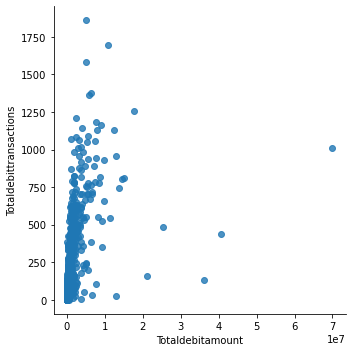

In [38]:
sns.lmplot(data=dvs_dummies, x='Totaldebitamount', y='Totaldebittransactions', fit_reg=False)

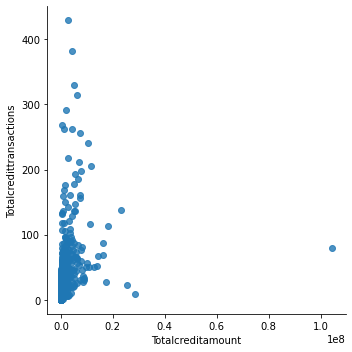

In [39]:
sns.lmplot(data=dvs_dummies, x='Totalcreditamount', y='Totalcredittransactions', fit_reg=False)

Text(0.5, 1.0, 'Total debit amount by churn')

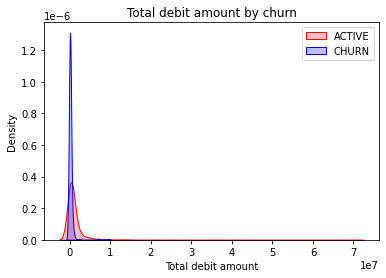

In [40]:
Mth = sns.kdeplot(dvs_dummies.Totaldebitamount[(dvs_dummies["Status"])==0 ],
                color="Red", shade = True)
Mth = sns.kdeplot(dvs_dummies.Totaldebitamount[(dvs_dummies["Status"])==1 ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["ACTIVE","CHURN"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Total debit amount')
Mth.set_title('Total debit amount by churn')

Text(0.5, 1.0, 'Total debit transactions by churn')

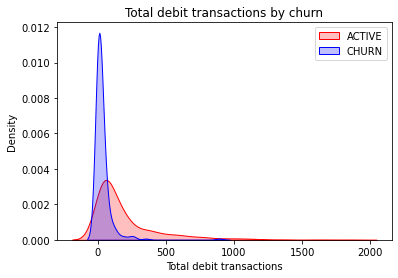

In [41]:
Mth = sns.kdeplot(dvs_dummies.Totaldebittransactions[(dvs_dummies["Status"])==0 ],
                color="Red", shade = True)
Mth = sns.kdeplot(dvs_dummies.Totaldebittransactions[(dvs_dummies["Status"])==1 ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["ACTIVE","CHURN"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Total debit transactions')
Mth.set_title('Total debit transactions by churn')

Text(0.5, 1.0, 'Total credit amount by churn')

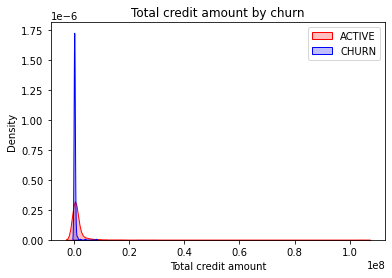

In [42]:
Mth = sns.kdeplot(dvs_dummies.Totalcreditamount[(dvs_dummies["Status"])==0 ],
                color="Red", shade = True)
Mth = sns.kdeplot(dvs_dummies.Totalcreditamount[(dvs_dummies["Status"])==1 ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["ACTIVE","CHURN"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Total credit amount')
Mth.set_title('Total credit amount by churn')

Text(0.5, 1.0, 'Total dedit transactions by churn')

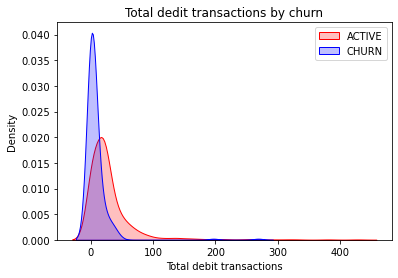

In [43]:
Mth = sns.kdeplot(dvs_dummies.Totalcredittransactions[(dvs_dummies["Status"])==0 ],
                color="Red", shade = True)
Mth = sns.kdeplot(dvs_dummies.Totalcredittransactions[(dvs_dummies["Status"])==1 ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["ACTIVE","CHURN"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Total debit transactions')
Mth.set_title('Total dedit transactions by churn')

<AxesSubplot:>

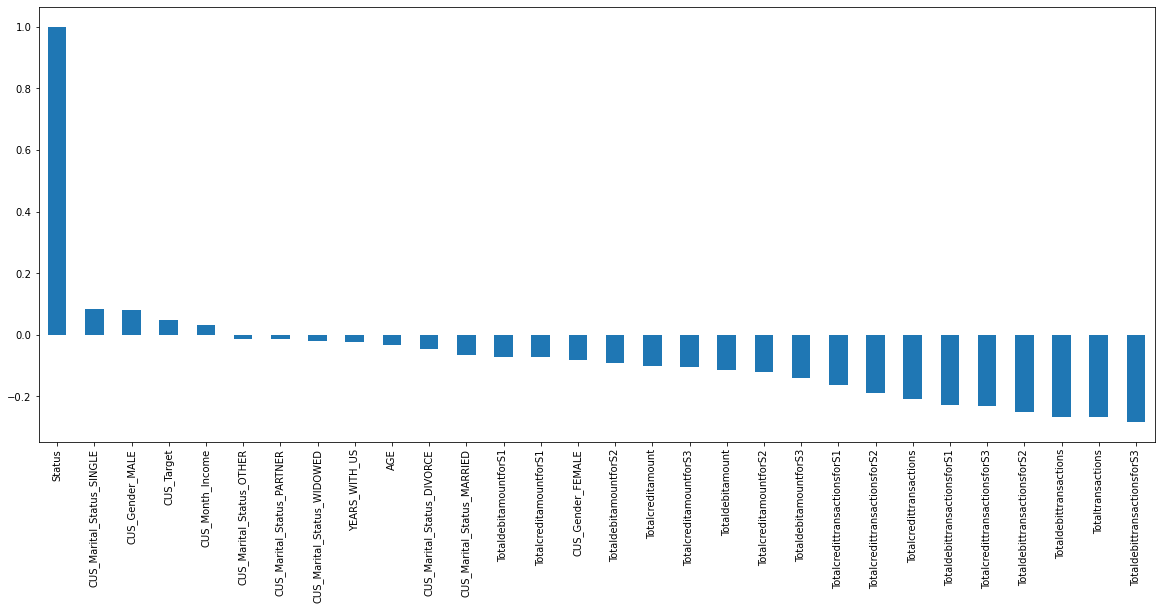

In [44]:
plt.figure(figsize=(20,8))
dvs_dummies.corr()['Status'].sort_values(ascending = False).plot(kind='bar')

In [45]:
new_df1_target0=dvs_new.loc[dvs_new["Status"]==0]
new_df1_target1=dvs_new.loc[dvs_new["Status"]==1]

In [46]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

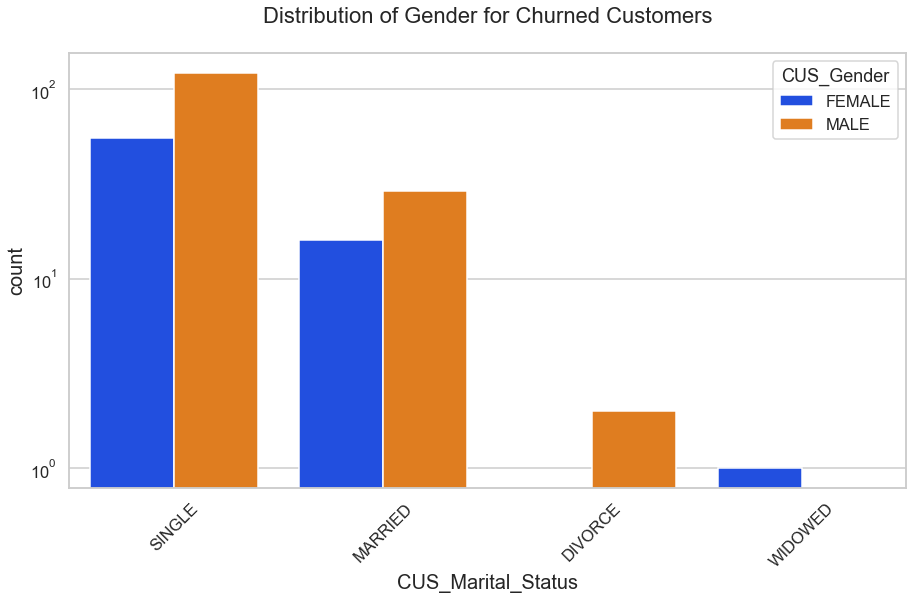

In [46]:
uniplot(new_df1_target1,col='CUS_Marital_Status',title='Distribution of Gender for Churned Customers',hue='CUS_Gender')

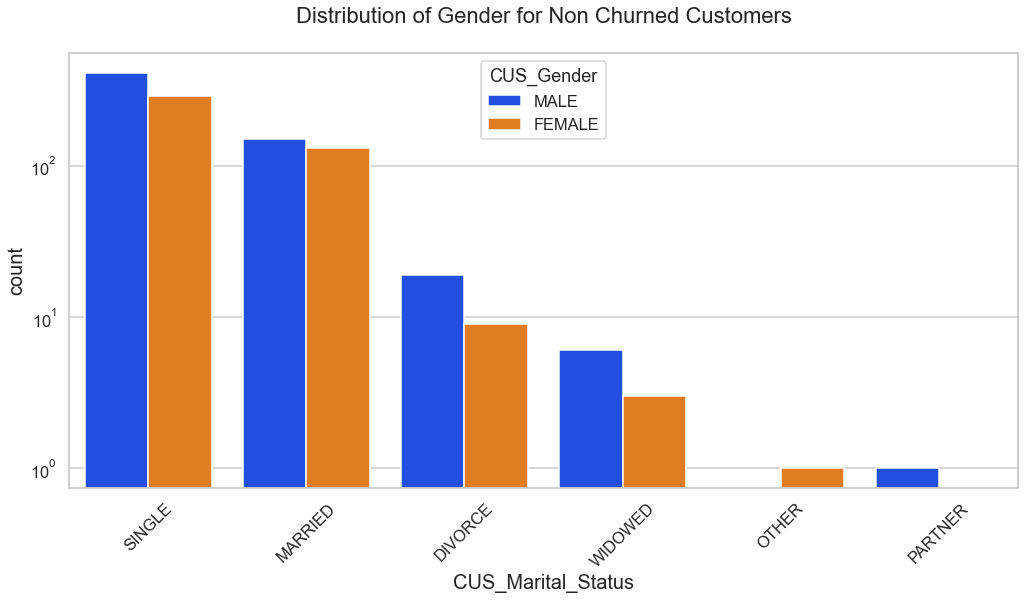

In [47]:
uniplot(new_df1_target0,col='CUS_Marital_Status',title='Distribution of Gender for Non Churned Customers',hue='CUS_Gender')

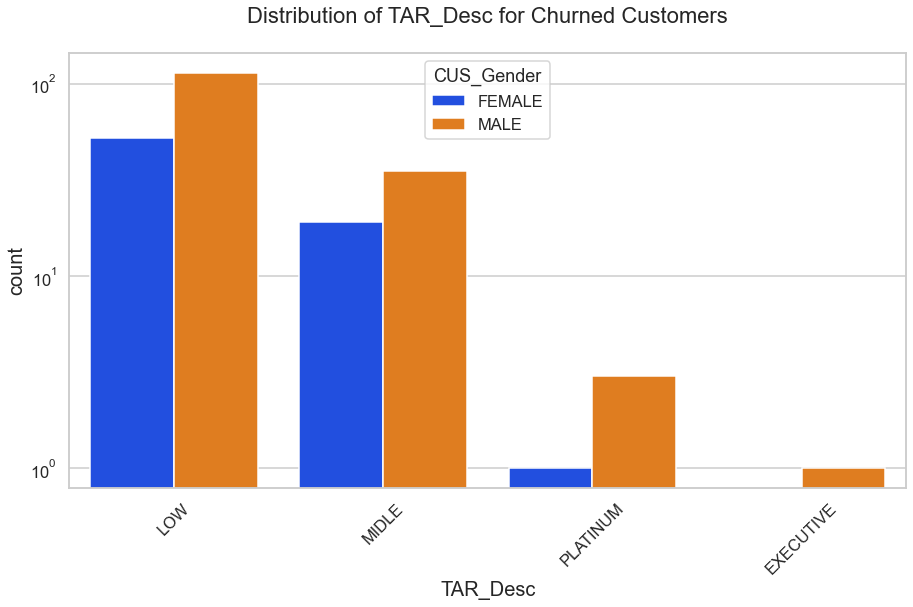

In [48]:
uniplot(new_df1_target1,col='TAR_Desc',title='Distribution of TAR_Desc for Churned Customers',hue='CUS_Gender')

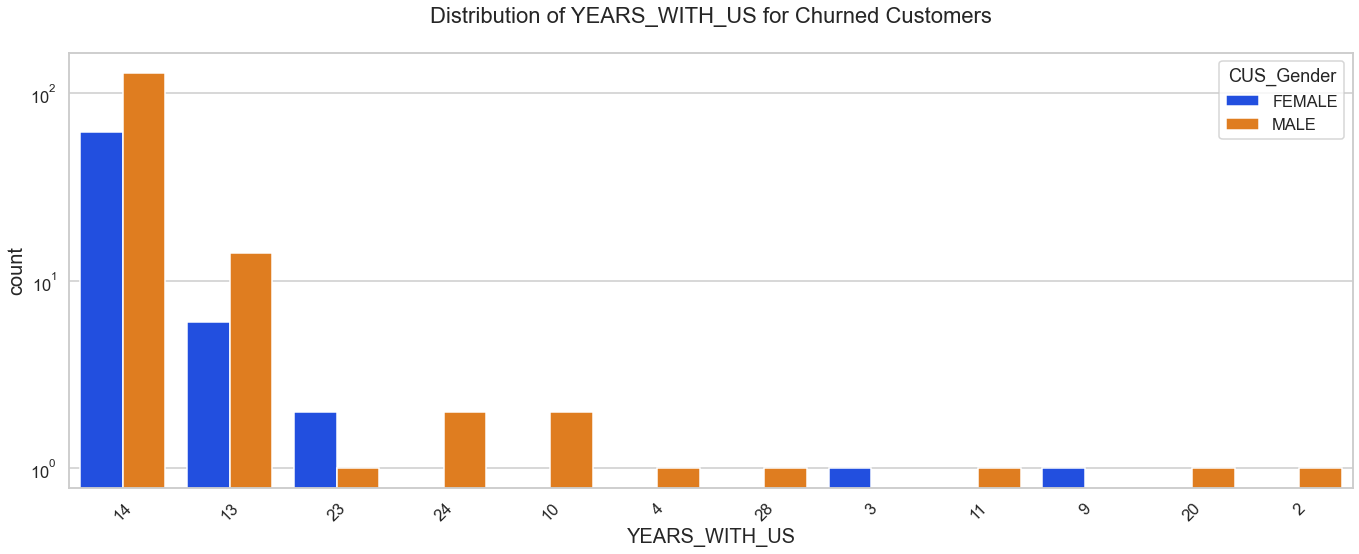

In [49]:
uniplot(new_df1_target1,col='YEARS_WITH_US',title='Distribution of YEARS_WITH_US for Churned Customers',hue='CUS_Gender')

# CONCLUSION

These are some of the quick insights from this exercise:

1. Singles are the highest churners
2. 'TAR_Desc' of Low group r more likely to be churned
3. surprisingly 'YEARS_WITH_US' of 13 to 14 are more churners


In [47]:
dvs_dummies.to_csv('bank_churn.csv')

# Building Model

In [48]:
df=pd.read_csv("bank_churn.csv")
df.head()

,Unnamed: 0,AGE,CUS_Month_Income,YEARS_WITH_US,TotaldebittransactionsforS1,TotaldebittransactionsforS2,TotaldebittransactionsforS3,TotaldebitamountforS1,TotaldebitamountforS2,TotaldebitamountforS3,...,CUS_Target,Status,CUS_Gender_FEMALE,CUS_Gender_MALE,CUS_Marital_Status_DIVORCE,CUS_Marital_Status_MARRIED,CUS_Marital_Status_OTHER,CUS_Marital_Status_PARTNER,CUS_Marital_Status_SINGLE,CUS_Marital_Status_WIDOWED
0,0,49,7116.64,25,277,265,345,1459126.64,1230543.08,2068641.91,...,2231,0,0,1,0,1,0,0,0,0
1,1,46,1500000.00,14,37,15,45,35372.55,20134.00,83856.67,...,2223,0,1,0,0,0,0,0,1,0
2,2,53,5000000.00,14,31,14,8,28248.85,4777.66,4348.95,...,2222,0,1,0,0,0,0,0,1,0
3,3,15,500.00,14,0,1,0,0.00,4000.00,0.00,...,2223,0,1,0,0,0,0,0,1,0
4,4,48,9000000.00,5,15,33,12,69083.38,223007.51,46379.40,...,2223,0,1,0,0,0,0,0,1,0


In [49]:
df=df.drop('Unnamed: 0',axis=1)

In [50]:
df

,AGE,CUS_Month_Income,YEARS_WITH_US,TotaldebittransactionsforS1,TotaldebittransactionsforS2,TotaldebittransactionsforS3,TotaldebitamountforS1,TotaldebitamountforS2,TotaldebitamountforS3,TotalcredittransactionsforS1,...,CUS_Target,Status,CUS_Gender_FEMALE,CUS_Gender_MALE,CUS_Marital_Status_DIVORCE,CUS_Marital_Status_MARRIED,CUS_Marital_Status_OTHER,CUS_Marital_Status_PARTNER,CUS_Marital_Status_SINGLE,CUS_Marital_Status_WIDOWED
0,49,7116.64,25,277,265,345,1459126.64,1230543.08,2068641.91,10,...,2231,0,0,1,0,1,0,0,0,0
1,46,1500000.00,14,37,15,45,35372.55,20134.00,83856.67,2,...,2223,0,1,0,0,0,0,0,1,0
2,53,5000000.00,14,31,14,8,28248.85,4777.66,4348.95,14,...,2222,0,1,0,0,0,0,0,1,0
3,15,500.00,14,0,1,0,0.00,4000.00,0.00,5,...,2223,0,1,0,0,0,0,0,1,0
4,48,9000000.00,5,15,33,12,69083.38,223007.51,46379.40,8,...,2223,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,68,4500.00,14,13,12,1,3069.60,2376.00,200.00,0,...,2223,1,0,1,0,0,0,0,1,0
1243,35,3500000.00,14,55,35,37,119297.02,118884.00,147554.88,7,...,2222,0,0,1,0,0,0,0,1,0
1244,34,1000.00,14,415,368,424,1068684.72,571814.89,833122.07,63,...,2232,0,0,1,0,0,0,0,1,0
1245,69,2000000.00,14,147,202,234,397602.73,514584.25,459665.24,11,...,2222,0,0,1,0,0,0,0,1,0


In [51]:
X=df.drop(['Status','AGE','YEARS_WITH_US'],axis=1)
X

,CUS_Month_Income,TotaldebittransactionsforS1,TotaldebittransactionsforS2,TotaldebittransactionsforS3,TotaldebitamountforS1,TotaldebitamountforS2,TotaldebitamountforS3,TotalcredittransactionsforS1,TotalcredittransactionsforS2,TotalcredittransactionsforS3,...,Totaltransactions,CUS_Target,CUS_Gender_FEMALE,CUS_Gender_MALE,CUS_Marital_Status_DIVORCE,CUS_Marital_Status_MARRIED,CUS_Marital_Status_OTHER,CUS_Marital_Status_PARTNER,CUS_Marital_Status_SINGLE,CUS_Marital_Status_WIDOWED
0,7116.64,277,265,345,1459126.64,1230543.08,2068641.91,10,24,31,...,952,2231,0,1,0,1,0,0,0,0
1,1500000.00,37,15,45,35372.55,20134.00,83856.67,2,4,4,...,107,2223,1,0,0,0,0,0,1,0
2,5000000.00,31,14,8,28248.85,4777.66,4348.95,14,8,5,...,80,2222,1,0,0,0,0,0,1,0
3,500.00,0,1,0,0.00,4000.00,0.00,5,4,3,...,13,2223,1,0,0,0,0,0,1,0
4,9000000.00,15,33,12,69083.38,223007.51,46379.40,8,7,6,...,81,2223,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,4500.00,13,12,1,3069.60,2376.00,200.00,0,0,0,...,26,2223,0,1,0,0,0,0,1,0
1243,3500000.00,55,35,37,119297.02,118884.00,147554.88,7,6,9,...,149,2222,0,1,0,0,0,0,1,0
1244,1000.00,415,368,424,1068684.72,571814.89,833122.07,63,76,78,...,1424,2232,0,1,0,0,0,0,1,0
1245,2000000.00,147,202,234,397602.73,514584.25,459665.24,11,14,23,...,631,2222,0,1,0,0,0,0,1,0


In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CUS_Month_Income              1247 non-null   float64
 1   TotaldebittransactionsforS1   1247 non-null   int64  
 2   TotaldebittransactionsforS2   1247 non-null   int64  
 3   TotaldebittransactionsforS3   1247 non-null   int64  
 4   TotaldebitamountforS1         1247 non-null   float64
 5   TotaldebitamountforS2         1247 non-null   float64
 6   TotaldebitamountforS3         1247 non-null   float64
 7   TotalcredittransactionsforS1  1247 non-null   int64  
 8   TotalcredittransactionsforS2  1247 non-null   int64  
 9   TotalcredittransactionsforS3  1247 non-null   int64  
 10  TotalcreditamountforS1        1247 non-null   float64
 11  TotalcreditamountforS2        1247 non-null   float64
 12  TotalcreditamountforS3        1247 non-null   float64
 13  Tot

In [53]:
y=df['Status']
y

0       0
1       0
2       0
3       0
4       0
       ..
1242    1
1243    0
1244    0
1245    0
1246    0
Name: Status, Length: 1247, dtype: int64

In [54]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.combine import SMOTEENN

In [55]:
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features
X.head()

,CUS_Month_Income,TotaldebittransactionsforS1,TotaldebittransactionsforS2,TotaldebittransactionsforS3,TotaldebitamountforS1,TotaldebitamountforS2,TotaldebitamountforS3,TotalcredittransactionsforS1,TotalcredittransactionsforS2,TotalcredittransactionsforS3,...,Totaltransactions,CUS_Target,CUS_Gender_FEMALE,CUS_Gender_MALE,CUS_Marital_Status_DIVORCE,CUS_Marital_Status_MARRIED,CUS_Marital_Status_OTHER,CUS_Marital_Status_PARTNER,CUS_Marital_Status_SINGLE,CUS_Marital_Status_WIDOWED
0,0.000089,0.387413,0.484461,0.455746,0.040834,0.033049,0.110829,0.052910,0.169014,0.183432,...,0.437644,0.80,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.018750,0.051748,0.027422,0.059445,0.000990,0.000541,0.004493,0.010582,0.028169,0.023669,...,0.048780,0.48,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.062500,0.043357,0.025594,0.010568,0.000791,0.000128,0.000233,0.074074,0.056338,0.029586,...,0.036355,0.44,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000006,0.000000,0.001828,0.000000,0.000000,0.000107,0.000000,0.026455,0.028169,0.017751,...,0.005522,0.48,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.112500,0.020979,0.060329,0.015852,0.001933,0.005989,0.002485,0.042328,0.049296,0.035503,...,0.036815,0.48,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=75)

# Decision Tree Classsifier

In [58]:
from sklearn import tree
dt_clf=tree.DecisionTreeClassifier(max_depth=5,splitter='best',min_samples_split=1.0,criterion='gini'
                                   ,min_samples_leaf=1,min_weight_fraction_leaf=0.0)
dt_clf.fit(X_train,y_train)
y_pred=dt_clf.predict(X_test)
dt_clf.score(X_test,y_test)

0.892

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       206
           1       0.69      0.70      0.70        44

    accuracy                           0.89       250
   macro avg       0.81      0.82      0.82       250
weighted avg       0.89      0.89      0.89       250



###### As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.

###### Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.

###### Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

In [60]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,y)

In [61]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2,random_state=75)

In [62]:
from sklearn import tree
model_dt_smote=tree.DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [63]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(classification_report(yr_test, yr_predict))

0.9012738853503185
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       140
           1       0.91      0.91      0.91       174

    accuracy                           0.90       314
   macro avg       0.90      0.90      0.90       314
weighted avg       0.90      0.90      0.90       314



In [64]:
print(confusion_matrix(yr_test, yr_predict))

[[124  16]
 [ 15 159]]


In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold,StratifiedKFold

In [66]:
dt_skf=StratifiedKFold(5,shuffle=True,random_state=2)
cross_val_score(model_dt_smote,X_resampled,y_resampled,cv=dt_skf,scoring='accuracy')

array([0.9044586 , 0.92675159, 0.9044586 , 0.91719745, 0.9456869 ])

In [67]:
clf_cross_val_score=np.mean(cross_val_score(model_dt_smote,X_resampled,y_resampled,cv=dt_skf,scoring='accuracy'))
clf_cross_val_score

0.9197106285993366

# Random Forest Classsifier

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=150,max_depth=1,min_impurity_decrease=0.0
                              ,bootstrap=True,min_samples_leaf=8)
rf_clf.fit(X_train,y_train)
rf_clf.score(X_test,y_test)

0.864

In [69]:
model_rf_smote=RandomForestClassifier(n_estimators=150,max_depth=1,min_impurity_decrease=0.0
                              ,bootstrap=True,min_samples_leaf=8)

In [70]:
model_rf_smote.fit(xr_train,yr_train)
yr_predict = model_rf_smote.predict(xr_test)
model_score_rf = model_rf_smote.score(xr_test, yr_test)
print(model_score_rf)
print(classification_report(yr_test, yr_predict))

0.8885350318471338
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       140
           1       0.90      0.90      0.90       174

    accuracy                           0.89       314
   macro avg       0.89      0.89      0.89       314
weighted avg       0.89      0.89      0.89       314



In [71]:
print(confusion_matrix(yr_test, yr_predict))

[[122  18]
 [ 17 157]]


In [72]:
rf_skf=StratifiedKFold(5,shuffle=True,random_state=2)
cross_val_score(model_rf_smote,X_resampled,y_resampled,cv=rf_skf,scoring='accuracy')

array([0.89490446, 0.92356688, 0.90764331, 0.91082803, 0.93929712])

In [73]:
clf_cross_val_score=np.mean(cross_val_score(model_rf_smote,X_resampled,y_resampled,cv=dt_skf,scoring='accuracy'))
clf_cross_val_score

0.9184367432490183

# Gradient Boosting Classsifier

In [74]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf=GradientBoostingClassifier(n_estimators=100,criterion='friedman_mse')
gb_clf.fit(X_train,y_train)
gb_clf.score(X_test,y_test)

0.88

In [75]:
model_gb_smote=GradientBoostingClassifier(n_estimators=100,criterion='friedman_mse')

In [76]:
model_gb_smote.fit(xr_train,yr_train)
yr_predict = model_gb_smote.predict(xr_test)
model_score_gb = model_gb_smote.score(xr_test, yr_test)
print(model_score_gb)
print(classification_report(yr_test, yr_predict))

0.9267515923566879
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       140
           1       0.93      0.94      0.93       174

    accuracy                           0.93       314
   macro avg       0.93      0.92      0.93       314
weighted avg       0.93      0.93      0.93       314



In [77]:
print(confusion_matrix(yr_test, yr_predict))

[[127  13]
 [ 10 164]]


In [78]:
gb_skf=StratifiedKFold(5,shuffle=True,random_state=2)
cross_val_score(model_gb_smote,X_resampled,y_resampled,cv=gb_skf,scoring='accuracy')

array([0.94904459, 0.97133758, 0.95859873, 0.93312102, 0.98083067])

In [79]:
clf_cross_val_score=np.mean(cross_val_score(model_gb_smote,X_resampled,y_resampled,cv=gb_skf,scoring='accuracy'))
clf_cross_val_score

0.9592254939866913

# GaussianNB Classifier

In [80]:
from sklearn.naive_bayes import GaussianNB
nb_clf=GaussianNB()
nb_clf.fit(X_train,y_train)
nb_clf.score(X_test,y_test)

0.42

In [81]:
model_nb_smote=GaussianNB()

In [82]:
model_nb_smote.fit(xr_train,yr_train)
yr_predict = model_nb_smote.predict(xr_test)
model_score_nb = model_nb_smote.score(xr_test, yr_test)
print(model_score_nb)
print(classification_report(yr_test, yr_predict))

0.7929936305732485
              precision    recall  f1-score   support

           0       0.86      0.64      0.73       140
           1       0.76      0.91      0.83       174

    accuracy                           0.79       314
   macro avg       0.81      0.78      0.78       314
weighted avg       0.80      0.79      0.79       314



In [83]:
print(confusion_matrix(yr_test, yr_predict))

[[ 90  50]
 [ 15 159]]


In [84]:
nb_skf=StratifiedKFold(5,shuffle=True,random_state=2)
cross_val_score(model_nb_smote,X_resampled,y_resampled,cv=nb_skf,scoring='accuracy')

array([0.81847134, 0.84713376, 0.83757962, 0.81847134, 0.84664537])

In [85]:
clf_cross_val_score=np.mean(cross_val_score(model_nb_smote,X_resampled,y_resampled,cv=nb_skf,scoring='accuracy'))
clf_cross_val_score

0.8336602836735109

# K-Neighbor Classsifier

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(n_neighbors=7)
knn_clf.fit(X_train,y_train)
y_pred=knn_clf.predict(X_test)
knn_clf.score(X_test,y_test)

0.824

In [87]:
model_knn_smote=KNeighborsClassifier(n_neighbors=7)

In [88]:
model_knn_smote.fit(xr_train,yr_train)
yr_predict = model_knn_smote.predict(xr_test)
model_score_knn = model_knn_smote.score(xr_test, yr_test)
print(model_score_knn)
print(classification_report(yr_test, yr_predict))

0.9426751592356688
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       140
           1       0.93      0.97      0.95       174

    accuracy                           0.94       314
   macro avg       0.95      0.94      0.94       314
weighted avg       0.94      0.94      0.94       314



In [89]:
print(confusion_matrix(yr_test, yr_predict))

[[127  13]
 [  5 169]]


In [90]:
knn_skf=StratifiedKFold(5,shuffle=True,random_state=2)
cross_val_score(model_knn_smote,X_resampled,y_resampled,cv=knn_skf,scoring='accuracy')

array([0.93630573, 0.95541401, 0.94904459, 0.97133758, 0.96166134])

In [91]:
clf_cross_val_score=np.mean(cross_val_score(model_knn_smote,X_resampled,y_resampled,cv=knn_skf,scoring='accuracy'))
clf_cross_val_score

0.9547526505362122

# Logistic Regression Classsifier

In [92]:
from sklearn.linear_model import LogisticRegression
lr_clf=LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.824

In [93]:
model_lr_smote=LogisticRegression()

In [94]:
model_lr_smote.fit(xr_train,yr_train)
yr_predict = model_lr_smote.predict(xr_test)
model_score_lr = model_lr_smote.score(xr_test, yr_test)
print(model_score_lr)
print(classification_report(yr_test, yr_predict))

0.8343949044585988
              precision    recall  f1-score   support

           0       0.95      0.66      0.78       140
           1       0.78      0.97      0.87       174

    accuracy                           0.83       314
   macro avg       0.87      0.82      0.82       314
weighted avg       0.86      0.83      0.83       314



In [95]:
print(confusion_matrix(yr_test, yr_predict))

[[ 93  47]
 [  5 169]]


In [96]:
lr_skf=StratifiedKFold(5,shuffle=True,random_state=2)
cross_val_score(model_lr_smote,X_resampled,y_resampled,cv=knn_skf,scoring='accuracy')

array([0.85350318, 0.87898089, 0.86624204, 0.88535032, 0.88498403])

In [97]:
clf_cross_val_score=np.mean(cross_val_score(model_lr_smote,X_resampled,y_resampled,cv=lr_skf,scoring='accuracy'))
clf_cross_val_score

0.873812091736025

# SVM Classsifier

In [98]:
from sklearn.svm import SVC
from sklearn.svm import SVC
svc_model=SVC(kernel='sigmoid',gamma='auto',C=2)
svc_model.fit(X_train, y_train)
svc_model.score(X_test,y_test)

0.824

In [99]:
model_svc_smote=SVC(kernel='linear',gamma='auto',C=4)

In [100]:
model_svc_smote.fit(xr_train,yr_train)
yr_predict = model_svc_smote.predict(xr_test)
model_score_svc = model_svc_smote.score(xr_test, yr_test)
print(model_score_svc)
print(classification_report(yr_test, yr_predict))

0.8789808917197452
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       140
           1       0.87      0.91      0.89       174

    accuracy                           0.88       314
   macro avg       0.88      0.87      0.88       314
weighted avg       0.88      0.88      0.88       314



In [101]:
print(confusion_matrix(yr_test, yr_predict))

[[117  23]
 [ 15 159]]


In [102]:
svc_skf=StratifiedKFold(5,shuffle=True,random_state=2)
cross_val_score(model_svc_smote,X_resampled,y_resampled,cv=svc_skf,scoring='accuracy')

array([0.88216561, 0.92356688, 0.89808917, 0.90764331, 0.91054313])

In [103]:
clf_cross_val_score=np.mean(cross_val_score(model_svc_smote,X_resampled,y_resampled,cv=svc_skf,scoring='accuracy'))
clf_cross_val_score

0.9044016198286563

In [129]:
import pickle

In [138]:
filename = 'model.dvs'

In [139]:
pickle.dump(model_knn_smote, open(filename, 'wb'))

In [140]:
load_model = pickle.load(open(filename, 'rb'))

In [141]:
model_score_knn = load_model.score(xr_test, yr_test)

In [142]:
model_score_knn

0.9426751592356688

##### Our final model i.e. Gradient Boosting Classifier with SMOTEENN, is now ready and dumped in model.sav, 
##### which we will use and prepare API's so that we can access our model from UI.